In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

In [2]:
# each point is length, width, type (0, 1)

data=[[3,1.5,1],
      [2,1,0],
      [4,1.5,1],
      [3,1,0],
      [3.5,0.5,1],
      [2,0.5,0],
      [5.5,1,1],
      [1,1,0]]
mystery_flower=[4.5,1]

In [3]:
# network

#     o   flower type
#    / \     w1, w2, b
#   o   o    length, width


In [4]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

def sigmoid_P(x):
    return sigmoid (x)*(1-sigmoid(x))

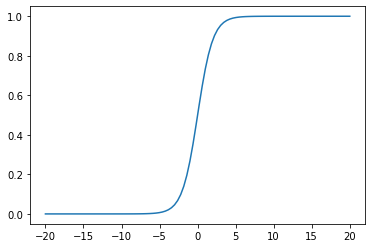

In [5]:
T=np.linspace(-20, 20, 100)
Y=sigmoid(T)
plt.plot(T,Y)

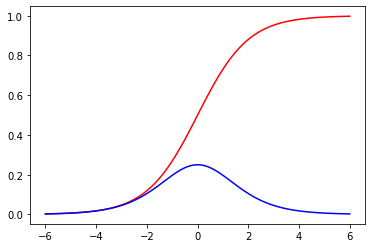

In [6]:
T=np.linspace(-6,6,100)
plt.plot(T,sigmoid(T),c='r')
plt.plot(T,sigmoid_P(T), c='b')

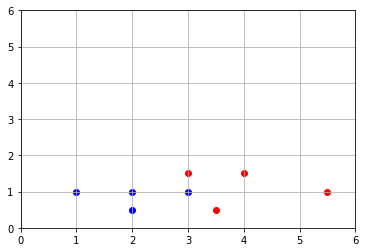

In [7]:
# scatter data
plt.axis([0, 6, 0, 6])
plt.grid()
for i in range(len(data)):
    point=data[i]
    color="r"
    if point[2]== 0:
        color="b"
    plt.scatter(point[0], point[1], c=color)

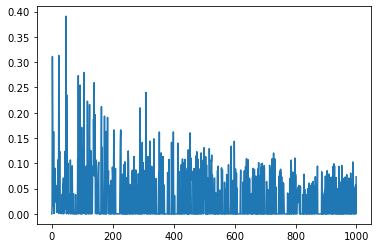

In [8]:
# training loop

learning_rate = 0.3
costs=[]

w1=np.random.randn()
w2=np.random.randn()
b=np.random.randn()

for i in range(100000):
    ri=np.random.randint(len(data))
    point=data[ri]
    
    z=point[0]*w1+point[1]*w2+b
    pred=sigmoid(z)
    
    target=point[2]
    cost=np.square(pred-target)
    
           
    dcost_pred= 2*(pred-target)
    dpred_dz=sigmoid_P(z)*(1-sigmoid(z))
    
    dz_dw1=point[0]
    dz_dw2=point[1]
    dz_db=1
    
    dcost_dz=dcost_pred*dpred_dz
    
    dcost_dw1=dcost_dz*dz_dw1
    dcost_dw2=dcost_dz*dz_dw2
    dcost_db=dcost_dz*dz_db
    
    w1=w1-learning_rate*dcost_dw1
    w2=w2-learning_rate*dcost_dw2
    b=b-learning_rate*dcost_db
    
    if i % 100==0:
        cost_sum=0
        for j in range(len(data)):
            point=data[ri]
           
            z=point[0]*w1+point[1]*w2+b
            pred=sigmoid(z)
            
            target=point[2]
            cost_sum +=np.square(pred-target)
            
        costs.append(cost_sum/len(data))
        
plt.plot(costs)

In [9]:
w1

8.407509872178087

In [10]:
w2

4.109423978941195

In [11]:
b

-30.130322850049144

In [12]:
# seeing model predictions

for i in range(len(data)):
    point=data[i]
    print(point)
    z=point[0]*w1+point[1]*w2+b
    pred=sigmoid(z)
    print("pred:{}".format(pred))

[3, 1.5, 1]
pred:0.7783958875390485
[2, 1, 0]
pred:0.00010043703252861484
[4, 1.5, 1]
pred:0.9999364647789935
[3, 1, 0]
pred:0.3103744591560081
[3.5, 0.5, 1]
pred:0.7942397467791341
[2, 0.5, 0]
pred:1.287009716827322e-05
[5.5, 1, 1]
pred:0.999999998346556
[1, 1, 0]
pred:2.2418282647911562e-08


In [13]:
z=mystery_flower[0]*w1+mystery_flower[1]*w2+b
pred=sigmoid(z)
pred

0.9999925916510856

In [14]:
def which_flower(length, width):
    z=length*w1+width*w2+b
    print(z)
    pred=sigmoid(z)
    if pred<0.5:
        print("blue")
    else:
        print("red")

In [15]:
which_flower(0.5,1)

-21.817143935018905
blue


In [16]:
which_flower(4.5,1)

11.81289555369344
red


In [17]:
import os

In [18]:
from gtts import gTTS
tts=gTTS(text='紅色', lang='zh-TW')
tts.save('red.mp3')

tts=gTTS(text='綠色', lang='zh-TW')
tts.save('green.mp3')

In [19]:
def which_flower(length, width):
    z=length*w1+width*w2+b
    print(z)
    pred=sigmoid(z)
    
    if pred < 0.5:
        os.system("green.mp3")
        
    else: 
        os.system("red.mp3")

In [20]:
which_flower(4.5, 1)

11.81289555369344


In [21]:
which_flower(0.4, 2)

-18.54847094329552


In [ ]:
# Beginner Intro to Neural Networks 11: Neural Network in Javascrit
#  www.youtube.com/watch?v=gQLKufQ35VE

In [ ]:
# Beginner Intro to Neural Networks 12 Neural Network in Python from Scratch
# https://www.youtube.com/watch?v=LSr96IZQknc